Import

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import sklearn.metrics as sm
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets

Loading data

In [2]:
iris = datasets.load_iris()

Taking a look

In [3]:
type(iris)

sklearn.utils._bunch.Bunch

A Bunch is a dictionary object, wich is a sort of set with a couple of keys and values

In [4]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

Using Pandas to put the data in a tabular format

In [7]:
X = pd.DataFrame(iris['data'], columns=iris['feature_names'])
y = pd.DataFrame(iris['target'], columns=['target'])

In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [9]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   target  150 non-null    int32
dtypes: int32(1)
memory usage: 728.0 bytes


In [40]:
y.head()

,target
0,0
1,0
2,0
3,0
4,0


Splitting data

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0, stratify=y, shuffle=True)

Clustering with Kmeans

In [12]:
model = KMeans(n_clusters=3)
model.fit(X_train)
model.labels_

c:\Users\Franck\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 1, 1, 0, 1, 2, 2, 0, 0, 0, 0, 1, 0, 2, 2, 1, 0, 0, 1, 2, 1,
       1, 2, 2, 0, 0, 1, 0, 2, 0, 0, 1, 2, 0, 0, 2, 0, 2, 0, 0, 0, 1, 1,
       0, 0, 2, 2, 0, 1, 0, 2, 1, 1, 0, 0, 1, 1, 0, 2, 1, 1, 0, 2, 2, 0,
       0, 1, 1, 2, 0, 0, 1, 1, 2, 0, 2, 1, 0, 2, 0, 0, 0, 1, 0, 1, 1, 2,
       0, 0, 2, 1, 1, 1, 1, 1, 0, 0, 0, 2, 1, 2, 1, 2, 1, 0, 0, 0, 0, 1,
       2, 0, 1, 0, 2, 2, 1, 2, 2, 0])

Visualization of train set

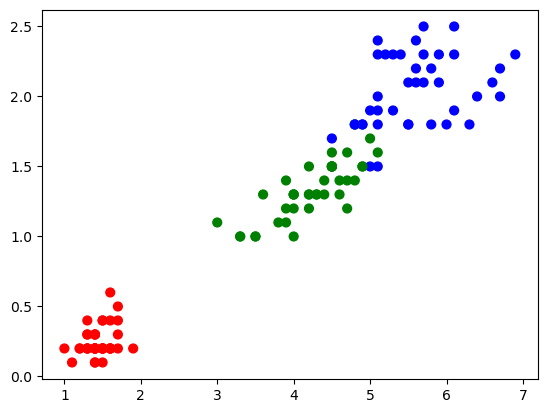

In [17]:
colormap=np.array(['Red','green','blue'])
plt.scatter(X_train['petal length (cm)'], X_train['petal width (cm)'], c = colormap[y_train['target']], s=40)
plt.show()

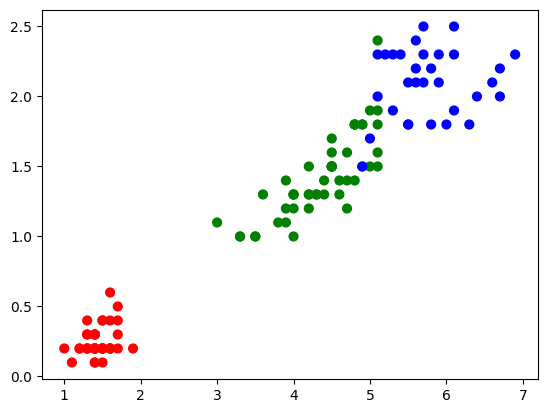

In [34]:
colormap=np.array(['blue','Red','green'])
plt.scatter(X_train['petal length (cm)'], X_train['petal width (cm)'], c=colormap[model.labels_], s=40)
plt.show()

Visualization of test set

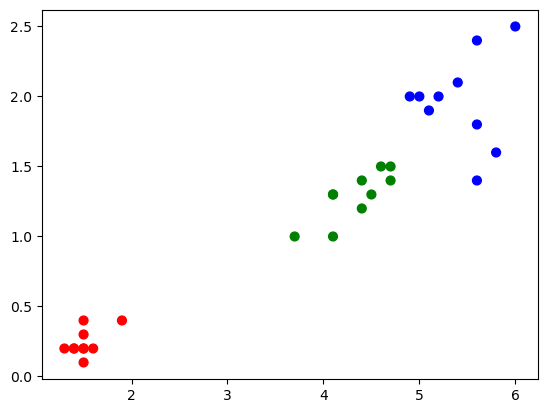

In [18]:
colormap=np.array(['Red','green','blue'])
plt.scatter(X_test['petal length (cm)'], X_test['petal width (cm)'], c=colormap[y_test['target']], s=40)
plt.show()

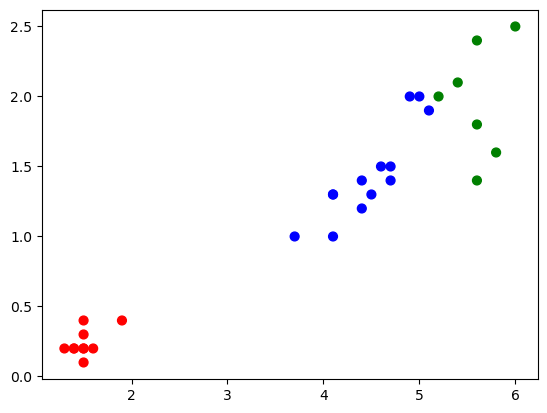

In [19]:
y_pred = model.predict(X_test)
colormap=np.array(['blue','Red','green'])
plt.scatter(X_test['petal length (cm)'], X_test['petal width (cm)'], c=colormap[y_pred], s=40)
plt.show()